# Clustering

Carga el dataset de Iris que viene en sklearn. Utiliza los algoritmos de clustering vistos para identificar grupos de acuerdo con la estructura de los datos. Compara los grupos resultantes con la clasificación 'oficial' que traen los datos. Ten en cuenta que el dataset viene organizado por clases, y que dependiendo del método de agrupamiento el ID de un cluster puede cambiar, incluso si preserva las mismas muestras.

- ¿Cuantos clusters encuentra DBSCAN?
- ¿Cual tipo de enlace (linkage) permite generar clusters que se parezcan a los grupos originales?
- ¿Que tal le va a K-means?
- ¿Cambia mucho el resultado de los metodos para diferentes subconjuntos de caracteristicas?

In [97]:
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import pandas as pd

In [72]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

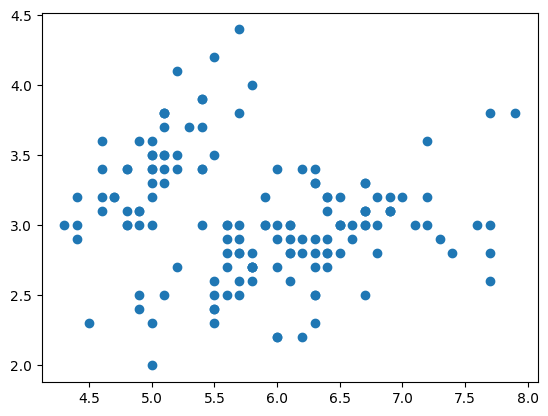

In [73]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## DBSCAN

In [67]:
db = DBSCAN(eps=0.35, min_samples=2).fit(X)
db

DBSCAN(eps=0.35, min_samples=2)

In [68]:
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 2


In [69]:
print(f"Homogeneity: {metrics.homogeneity_score(y, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(y, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(y, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.584
Completeness: 0.841
V-measure: 0.689
Adjusted Rand Index: 0.552
Adjusted Mutual Information: 0.681
Silhouette Coefficient: 0.394


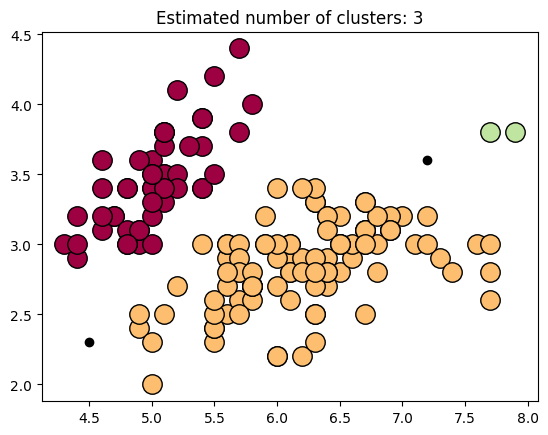

In [70]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

## Linkage Agglomerative Clustering

In [108]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(X)
labels = clustering_model.labels_

clustering_model_no_clusters = AgglomerativeClustering(linkage="ward")
clustering_model_no_clusters.fit(df)
labels_no_clusters = clustering_model_no_clusters.labels_

Text(0.5, 1.0, 'Without choosing number of clusters')

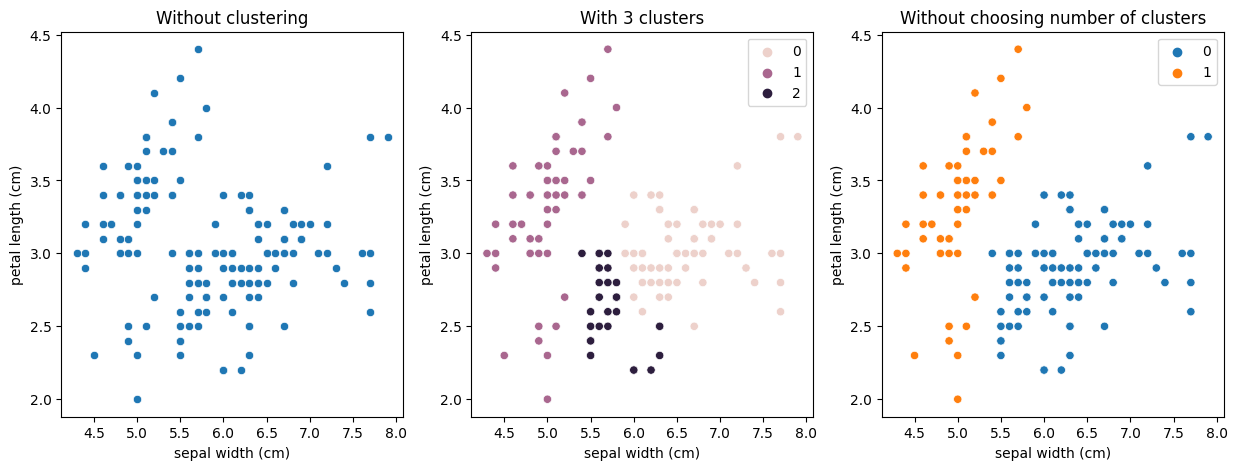

In [110]:
df = pd.DataFrame(X, columns=['sepal width (cm)', 'petal length (cm)']) 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='sepal width (cm)', y='petal length (cm)').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='sepal width (cm)', y='petal length (cm)', hue=clustering_model.labels_).set_title('With 3 clusters')
sns.scatterplot(ax=axes[2], data=df, x='sepal width (cm)', y='petal length (cm)', hue=clustering_model_no_clusters.labels_).set_title('Without choosing number of clusters')